In [1]:
import pandas as pd

dataset = pd.read_csv('Dataset.csv')

In [2]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [6]:
dataset['Item_Weight'].mean()

12.857645184136183

In [7]:
import math
for i in range(len(dataset)):
    if math.isnan(dataset.loc[i,'Item_Weight']):
        item_type = dataset.loc[i, 'Item_Type']
        dataset.loc[i, 'Item_Weight'] = dataset[dataset['Item_Type'] == item_type]['Item_Weight'].mean()

In [8]:
#dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset[dataset['Item_Weight']].mean())

In [9]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
dataset['Item_Weight'].value_counts()

12.150000    86
17.600000    82
13.650000    77
11.800000    76
9.300000     68
             ..
13.384736     1
12.817344     1
12.305705     1
6.520000      1
13.690731     1
Name: Item_Weight, Length: 663, dtype: int64

In [11]:
dataset['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [12]:
dataset['Outlet_Size'].mode()[0]

'Medium'

In [13]:
for i in range(len(dataset)):
    if str(dataset.loc[i,'Outlet_Size']) == 'nan':
        item_type = dataset.loc[i, 'Item_Type']
        dataset.loc[i, 'Outlet_Size'] = dataset[dataset['Item_Type'] == item_type]['Outlet_Size'].mode()[0]

In [14]:
#dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0])

In [15]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
dataset['Outlet_Size'].value_counts()

Medium    5157
Small     2434
High       932
Name: Outlet_Size, dtype: int64

In [17]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
dataset['Item_Visibility'].mean()

0.06613202877895127

In [20]:
dataset['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [21]:
def impute_item_visibility(val):
    if val == 0.000000:
        return dataset['Item_Visibility'].mean()
    else:
        return val

In [22]:
dataset['Item_Visibility'] = dataset['Item_Visibility'].apply(lambda x: impute_item_visibility(x))

In [23]:
dataset['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
           ... 
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [24]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
dataset.pivot_table(index='Item_Type', values='Item_Outlet_Sales')

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


In [26]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [28]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
dataset['Age_Of_Company'] = 2020 - dataset['Outlet_Establishment_Year']

In [30]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [31]:
dataset['Outlet_Size'].value_counts()

Medium    5157
Small     2434
High       932
Name: Outlet_Size, dtype: int64

In [32]:
#dataset['Outlet_Size'] = dataset['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2})

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = dataset.apply(le.fit_transform)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,156,284,0,663,4,5592,9,4,1,0,1,2540,4
1,8,57,1,879,14,473,3,8,1,2,2,422,0
2,662,623,0,714,10,2901,9,4,1,0,1,1639,4
3,1121,640,1,4432,6,4227,0,3,1,2,0,670,5
4,1297,265,0,4432,9,627,1,1,0,2,1,865,7


In [34]:
dataset['Outlet_Size'].value_counts()

Medium    5157
Small     2434
High       932
Name: Outlet_Size, dtype: int64

In [35]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [36]:
dataset.pivot_table(index='Outlet_Location_Type', values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


In [37]:
#dataset['Outlet_Location_Type_Encoded'] = dataset['Outlet_Location_Type'].replace({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})

In [38]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [39]:
dataset['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [40]:
dataset.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = dataset[['Age_Of_Company']]
Y = dataset['Item_Outlet_Sales']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
reg = LinearRegression().fit(X_train, Y_train)

In [46]:
Y_pred = reg.predict(X_test)

In [47]:
reg.score(X_train, Y_train)

0.0026687610606065393

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
mean_squared_error(Y_test, Y_pred)

2725666.4986621193

In [50]:
r2_score(Y_test, Y_pred)

-0.0028316838878865713

In [51]:
reg.score(X, Y)

0.0022500757526325854

In [52]:
 dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [53]:
X = dataset[['Item_Visibility', 'Age_Of_Company', 'Item_Weight', 'Item_MRP']]
Y = dataset['Item_Outlet_Sales']
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.3432717638621412

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 1200x1000 with 2 Axes>

In [55]:
#Correlation with output variable
cor_target = abs(cor['Item_Outlet_Sales'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Item_MRP             0.567574
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [56]:
# X = dataset[['Item_MRP', 'Item_Visibility', 'Age_Of_Company', 'Item_Weight', 'Outlet_Size']]
# Y = dataset['Item_Outlet_Sales']
# reg = LinearRegression(normalize=True).fit(X, Y)
# reg.score(X, Y)

In [57]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [58]:
X = df[['Item_MRP', 'Item_Visibility', 'Age_Of_Company', 'Item_Weight', 'Outlet_Size']]
Y = df['Item_Outlet_Sales']
reg = LinearRegression(normalize=True).fit(X, Y)
reg.score(X, Y)

0.3523105534015475

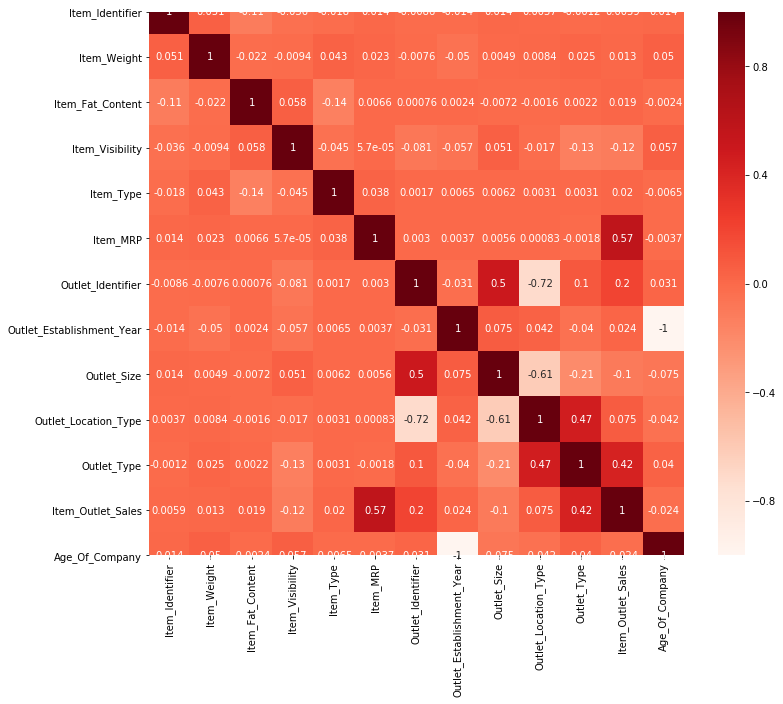

In [59]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [60]:
X = df[['Item_MRP', 'Outlet_Type', 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']]
Y = df['Item_Outlet_Sales']
reg = LinearRegression(normalize=True).fit(X, Y)
reg.score(X, Y)

0.5558379721322881

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
mean_squared_error(Y_test, Y_pred)

357772.81644933484

In [63]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,156,284,0,663,4,5592,9,4,1,0,1,2540,4
1,8,57,1,879,14,473,3,8,1,2,2,422,0
2,662,623,0,714,10,2901,9,4,1,0,1,1639,4
3,1121,640,1,4432,6,4227,0,3,1,2,0,670,5
4,1297,265,0,4432,9,627,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,0,3911,13,4955,1,1,0,2,1,2047,7
8519,897,233,1,3277,0,2023,7,5,1,1,1,516,3
8520,1357,299,0,2301,8,1263,6,6,2,1,1,1018,2
8521,681,149,1,7175,13,1857,3,8,1,2,2,1466,0


In [64]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [65]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [66]:
df['Item_Type'].describe()

count    8523.000000
mean        7.226681
std         4.209990
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        15.000000
Name: Item_Type, dtype: float64

In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [81]:
X_1 = dataset.iloc[:, 4].values
X_1

array(['Dairy', 'Soft Drinks', 'Meat', ..., 'Health and Hygiene',
       'Snack Foods', 'Soft Drinks'], dtype=object)

In [89]:
one_hot_encoded_training_predictors = pd.get_dummies(dataset.iloc[:, 4])
one_hot_encoded_training_predictors

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [95]:
frames = [df, one_hot_encoded_training_predictors]
result = pd.concat(frames, sort=True)

In [96]:
result.head()

,Age_Of_Company,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,...,Others,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,9.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,9.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,0.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN
4,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN


In [97]:
result.iloc[0, :]

Age_Of_Company                  4.0
Baking Goods                    NaN
Breads                          NaN
Breakfast                       NaN
Canned                          NaN
Dairy                           NaN
Frozen Foods                    NaN
Fruits and Vegetables           NaN
Hard Drinks                     NaN
Health and Hygiene              NaN
Household                       NaN
Item_Fat_Content                0.0
Item_Identifier               156.0
Item_MRP                     5592.0
Item_Outlet_Sales            2540.0
Item_Type                       4.0
Item_Visibility               663.0
Item_Weight                   284.0
Meat                            NaN
Others                          NaN
Outlet_Establishment_Year       4.0
Outlet_Identifier               9.0
Outlet_Location_Type            0.0
Outlet_Size                     1.0
Outlet_Type                     1.0
Seafood                         NaN
Snack Foods                     NaN
Soft Drinks                 

In [100]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Age_Of_Company'],
      dtype='object')

In [102]:
dataset['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [104]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [106]:
result.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Age_Of_Company,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,21,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,11,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,21,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,1998,732.3800,22,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,1987,994.7052,33,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [108]:
result.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Age_Of_Company',
       'Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1603)

In [111]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Age_Of_Company'],
      dtype='object')

In [112]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset_one = dataset[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Age_Of_Company']]
df_one = dataset_one.apply(le.fit_transform)
df_one.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company
0,156,284,0,663,5592,9,4,1,0,1,2540,4
1,8,57,1,879,473,3,8,1,2,2,422,0
2,662,623,0,714,2901,9,4,1,0,1,1639,4
3,1121,640,1,4432,4227,0,3,1,2,0,670,5
4,1297,265,0,4432,627,1,1,0,2,1,865,7


In [114]:
df_one['Item_Type'] = dataset['Item_Type'].values

In [115]:
df_one.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Company,Item_Type
0,156,284,0,663,5592,9,4,1,0,1,2540,4,Dairy
1,8,57,1,879,473,3,8,1,2,2,422,0,Soft Drinks
2,662,623,0,714,2901,9,4,1,0,1,1639,4,Meat
3,1121,640,1,4432,4227,0,3,1,2,0,670,5,Fruits and Vegetables
4,1297,265,0,4432,627,1,1,0,2,1,865,7,Household


In [116]:
result = pd.get_dummies(df_one)

In [117]:
result.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,284,0,663,5592,9,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8,57,1,879,473,3,8,1,2,2,...,0,0,0,0,0,0,0,0,1,0
2,662,623,0,714,2901,9,4,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1121,640,1,4432,4227,0,3,1,2,0,...,1,0,0,0,0,0,0,0,0,0
4,1297,265,0,4432,627,1,1,0,2,1,...,0,0,0,1,0,0,0,0,0,0


In [118]:
result.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Age_Of_Company', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [119]:
X = result[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Age_Of_Company', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']]
Y = result['Item_Outlet_Sales']
reg = LinearRegression(normalize=True).fit(X, Y)
reg.score(X, Y)

0.5563793642372215